In [56]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [74]:
import pandas as pd
import psycopg2
from matplotlib import animation
import cartopy.crs as ccrs
from datetime import datetime, timedelta

In [3]:
def query_db(query):
    '''
    Runs sql query on 311 database and returns a pandas DataFrame.
    Redshift is a data warehouse based on PostgreSQL, so syntax is mostly the
    same
    '''
    host = 'interview-ds.ckgnwnm6pw4o.us-east-1.redshift.amazonaws.com'
    port = 5439
    db = 'interview'
    username = 'dsguest'
    password = 'nX9EFYUZ5Yu#0q'
    conn = psycopg2.connect(host=host, port=port, dbname=db, user=username,
    password=password)
    cur = conn.cursor()
    cur.execute(query)
    rows = cur.fetchall()

    rows = pd.DataFrame(rows)
    return rows


In [4]:
# Example usage:
print(query_db("SELECT count(1) FROM public.three_one_one;"))

          0
0  21351116


In [7]:
num_rows = 10 ** 6

1000000

In [10]:
data = query_db(f'SELECT * FROM public.three_one_one limit {num_rows};')

In [11]:
len(data)

1000000

In [4]:
col_names = [
    'unique_key',
    'created_date',
    'closed_date',
    'agency',
    'agency_name',
    'complaint_type',
    'descriptor',
    'location_type',
    'incident_zip',
    'incident_address',
    'street_name',
    'cross_street_1',
    'cross_street_2',
    'intersection_street_1',
    'intersection_street_2',
    'address_type',
    'city',
    'landmark',
    'facility_type',
    'status',
    'due_date',
    'resolution_description',
    'resolution_action_updated_date',
    'community_board',
    'bbl',
    'borough',
    'x_coordinate_state_plane',
    'y_coordinate_state_plane',
    'open_data_channel_type',
    'park_facility_name',
    'park_borough',
    'vehicle_type',
    'taxi_company_borough',
    'taxi_pick_up_location',
    'bridge_highway_name',
    'bridge_highway_direction',
    'road_ramp',
    'bridge_highway_segment',
    'latitude',
    'longitude',
    'location'
]

In [15]:
data.columns = col_names

In [16]:
data.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,15629899,2010-01-01,2010-01-16,HPD,Department of Housing Preservation and Develop...,PLUMBING,WATER-LEAKS,RESIDENTIAL BUILDING,11106.0,31-54 29 STREET,...,,,,,,,,40.764035126914010,-73.92593527491938,"(40.76403512691401, -73.92593527491938)"
1,15630099,2010-01-01,2010-01-01,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10466.0,1405 EAST 233 STREET,...,,,,,,,,40.888997384527580,-73.83619209216230,"(40.88899738452758, -73.8361920921623)"
2,15630315,2010-01-01,2010-01-16,HPD,Department of Housing Preservation and Develop...,PLUMBING,BASIN/SINK,RESIDENTIAL BUILDING,11106.0,31-54 29 STREET,...,,,,,,,,40.764035126914010,-73.92593527491938,"(40.76403512691401, -73.92593527491938)"
3,15634732,2010-01-01,2010-01-26,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,CEILING,RESIDENTIAL BUILDING,10451.0,815 GERARD AVENUE,...,,,,,,,,40.825862900483810,-73.92591342884603,"(40.82586290048381, -73.92591342884603)"
4,15634748,2010-01-01,2010-01-04,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10460.0,441 MORRIS PARK AVENUE,...,,,,,,,,40.840322813358750,-73.87320792413288,"(40.84032281335875, -73.87320792413288)"


# There are a lot of junk complaint types

In [5]:
q = ''' 
SELECT
  complaint_type,
  COUNT(*) AS count
FROM
  public.three_one_one
GROUP BY
  complaint_type
ORDER BY count DESC;'''
compl_df = query_db(q)
compl_df

,0,1
0,Noise - Residential,1722501
1,HEAT/HOT WATER,1149728
2,Street Condition,939603
3,Street Light Condition,891730
4,HEATING,887869
5,Blocked Driveway,867920
6,Illegal Parking,839945
7,PLUMBING,701818
8,Water System,630164
9,GENERAL CONSTRUCTION,500863


<IPython.core.display.Javascript object>


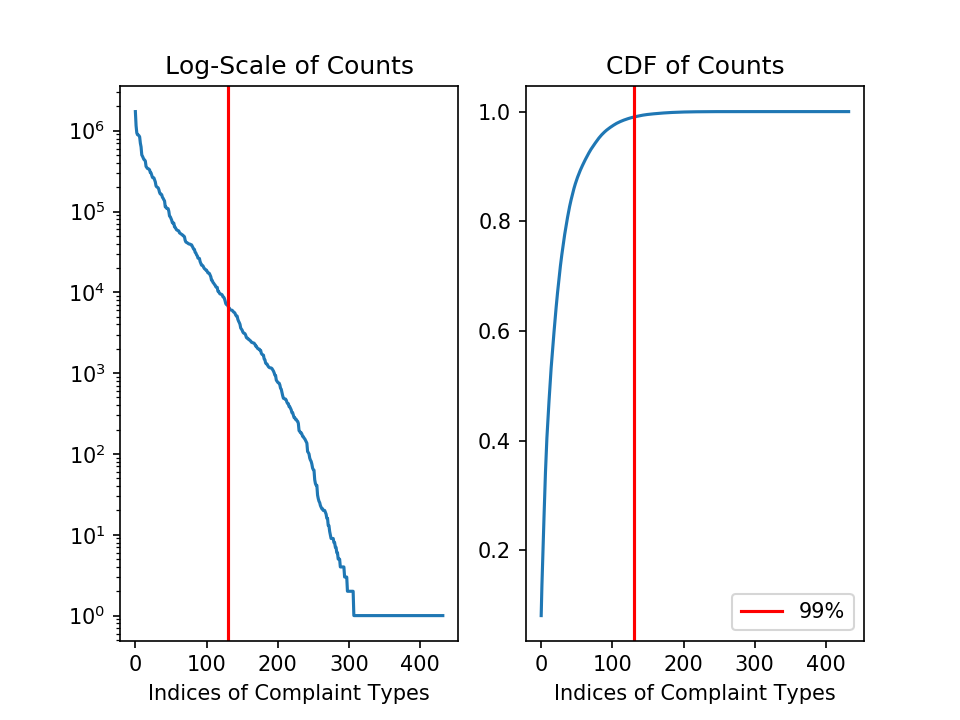

In [6]:
cdf = np.cumsum(compl_df[1].values) / np.sum(compl_df[1].values)
loc = np.where(cdf > .99)[0]
idx_cutoff = loc[0]
figure()
subplot(121)
semilogy(compl_df[1].values)
title('Log-Scale of Counts')
xlabel('Indices of Complaint Types')
axvline(x=idx_cutoff, color='r')

subplot(122)
plot(cdf)
title('CDF of Counts')
xlabel('Indices of Complaint Types')
axvline(x=idx_cutoff, color='r', label='99%')
legend()

In [7]:
complaint_types = list(compl_df[0].values[0:idx_cutoff])
sorted_types = list(compl_df[0].values[0:idx_cutoff])
sorted_types.sort()
sorted_types

['APPLIANCE',
 'Abandoned Vehicle',
 'Air Quality',
 'Animal Abuse',
 'Animal in a Park',
 'Asbestos',
 'BEST/Site Safety',
 'Benefit Card Replacement',
 'Blocked Driveway',
 'Boilers',
 'Borough Office',
 'Broken Muni Meter',
 'Broken Parking Meter',
 'Building Marshals office',
 'Building/Use',
 'Bus Stop Shelter Complaint',
 'Construction',
 'Construction Safety Enforcement',
 'Consumer Complaint',
 'Curb Condition',
 'DCA / DOH New License Application Request',
 'DHS Advantage - Tenant',
 'DHS Advantage -Landlord/Broker',
 'DOF Parking - Payment Issue',
 'DOF Parking - Request Copy',
 'DOF Parking - Request Status',
 'DOF Property - Owner Issue',
 'DOF Property - Payment Issue',
 'DOF Property - Reduction Issue',
 'DOF Property - Request Copy',
 'DOF Property - Update Account',
 'DOOR/WINDOW',
 'DPR Internal',
 'Damaged Tree',
 'Dead Tree',
 'Dead/Dying Tree',
 'Derelict Bicycle',
 'Derelict Vehicle',
 'Derelict Vehicles',
 'Dirty Conditions',
 'Drinking',
 'ELECTRIC',
 'Electrical

# Incidents Per Year

In [8]:
q = f''' 
SELECT
  EXTRACT(YEAR FROM created_date) as yr,
  COUNT(*) AS count
FROM
  public.three_one_one
GROUP BY
  yr
ORDER BY yr DESC;'''

yr_df = query_db(q)

<IPython.core.display.Javascript object>


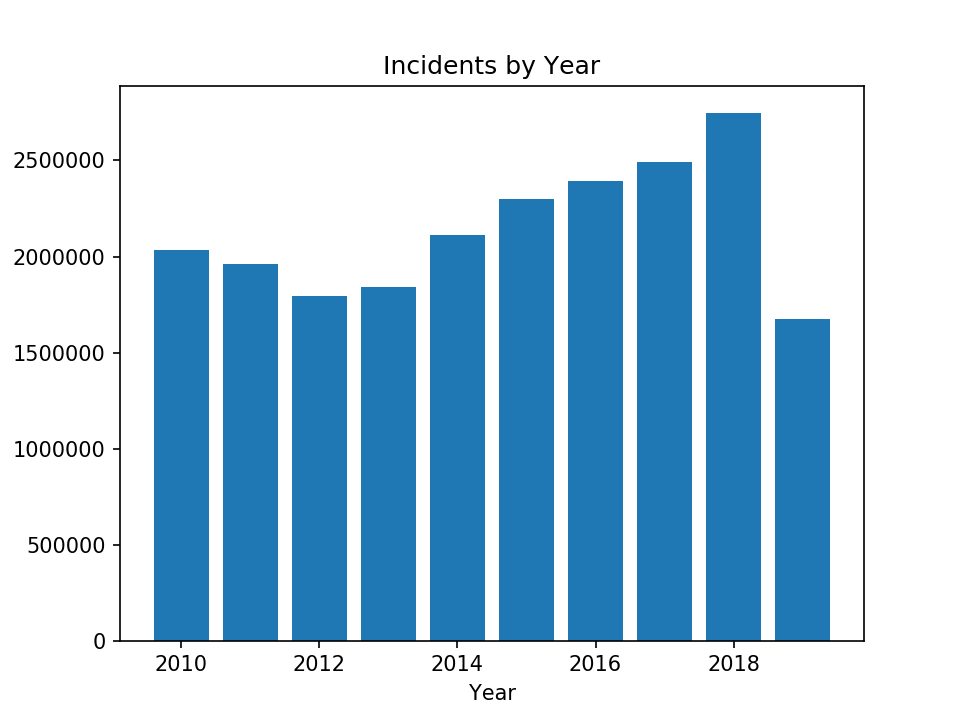

Text(0, 0.5, 'Number of Incidents')

In [9]:
figure()
bar(yr_df[0].values, yr_df[1].values)
title('Incidents by Year')
xlabel('Year')
ylabel('Number of Incidents')

# Is 2019 a low incident year, or is it due to missing data?
###  If all complaints come in at the end of the year, that could explain the drop

In [10]:
q = f''' 
SELECT
  EXTRACT(YEAR FROM created_date) as yr,
  CAST(CAST(yr AS varchar) + '-12-14' AS DATETIME) as deadline,
  COUNT(*) AS count
FROM
  public.three_one_one
WHERE created_date <= deadline
GROUP BY
  yr
ORDER BY yr DESC;'''

yr_deadline_df = query_db(q)

<IPython.core.display.Javascript object>


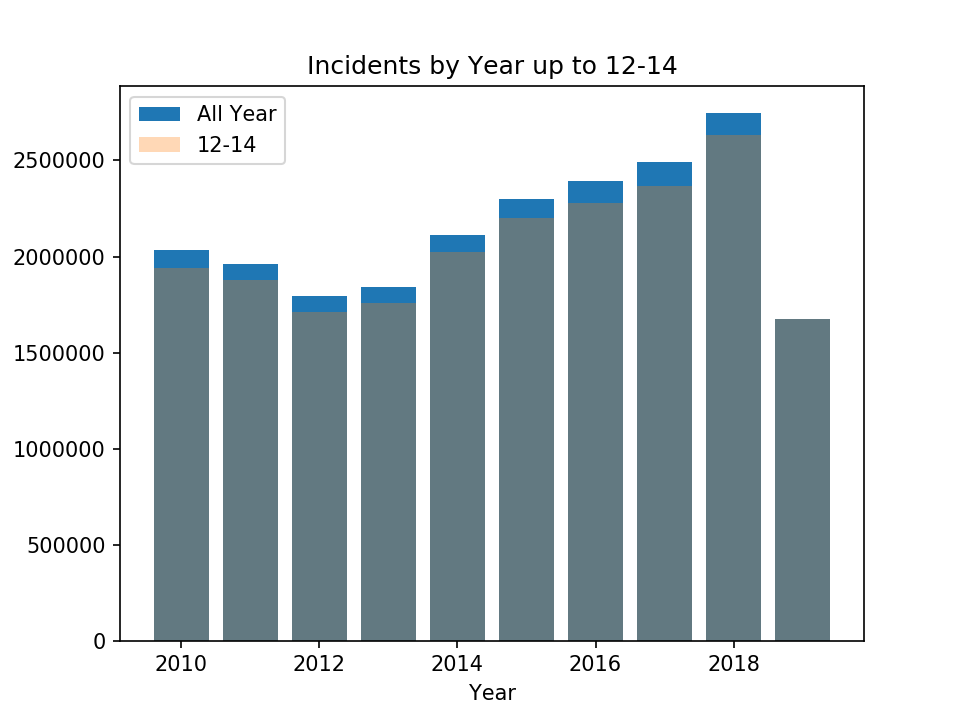

In [11]:
figure()
bar(yr_df[0].values, yr_df[1].values, label='All Year')
bar(yr_deadline_df[0].values, yr_deadline_df[2].values, alpha=0.3, label='12-14')
title('Incidents by Year up to 12-14')
xlabel('Year')
ylabel('Number of Incidents')
legend()

# What about each complaint category over time?
### Was there a decrease in one or two major complaint types due to implementing new policies, finishing construction, etc?

In [12]:
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
results = []
for y in years:
    q = f''' 
    SELECT
      complaint_type,
      COUNT(*) AS count
    FROM
      public.three_one_one
    WHERE complaint_Type in ({", ".join("'" + str(x) + "'" for x in complaint_types)})
    AND EXTRACT(YEAR FROM created_date) = {y}
    GROUP BY
      complaint_type
    ORDER BY count DESC;'''

    results.append(query_db(q))

In [13]:
len(results)

10

<IPython.core.display.Javascript object>


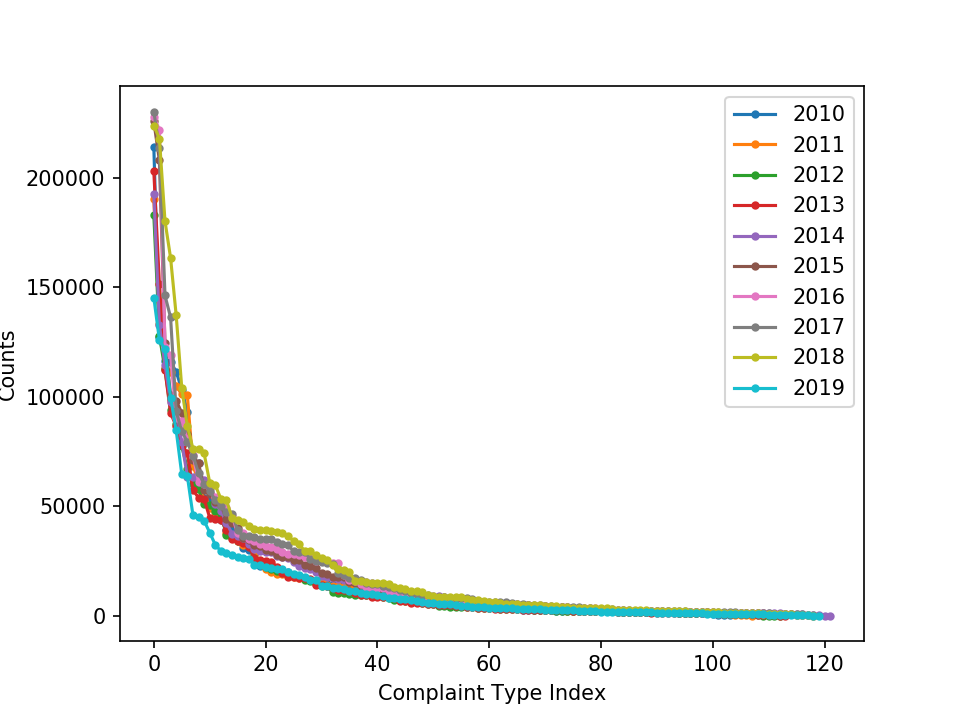

Text(0.5, 0, 'Complaint Type Index')

In [14]:
figure()
for i in range(10):
    plot(results[i][1].values, label=years[i], marker='.')
legend()
ylabel('Counts')
xlabel('Complaint Type Index')

# 2019 is down through out all the major complaint types from 2018
Possible questions to explore :
- Complaint System became more complicated to report
- State instituted complaint filtering policy
- Legislation to change what constitutes a violation

# Incidents by Borough

In [12]:
q = f''' 
SELECT
  borough,
  COUNT(*) AS count
FROM
  public.three_one_one
GROUP BY
  borough
ORDER BY count DESC;'''

borough_df = query_db(q)

In [13]:
borough_df

,0,1
0,BROOKLYN,6342836
1,QUEENS,4865070
2,MANHATTAN,4134900
3,BRONX,3718699
4,Unspecified,1218678
5,STATEN ISLAND,1070930
6,,3


In [15]:
borough = ['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND', 'Unspecified']
b_yr_results = []
for b in borough:
    
    q = f''' 
    SELECT
      EXTRACT(YEAR FROM created_date) as yr,
      COUNT(*) AS count
    FROM
      public.three_one_one
    WHERE borough='{b}'
    GROUP BY
      yr
    ORDER BY yr DESC;'''

    b_yr_results.append(query_db(q))

<IPython.core.display.Javascript object>


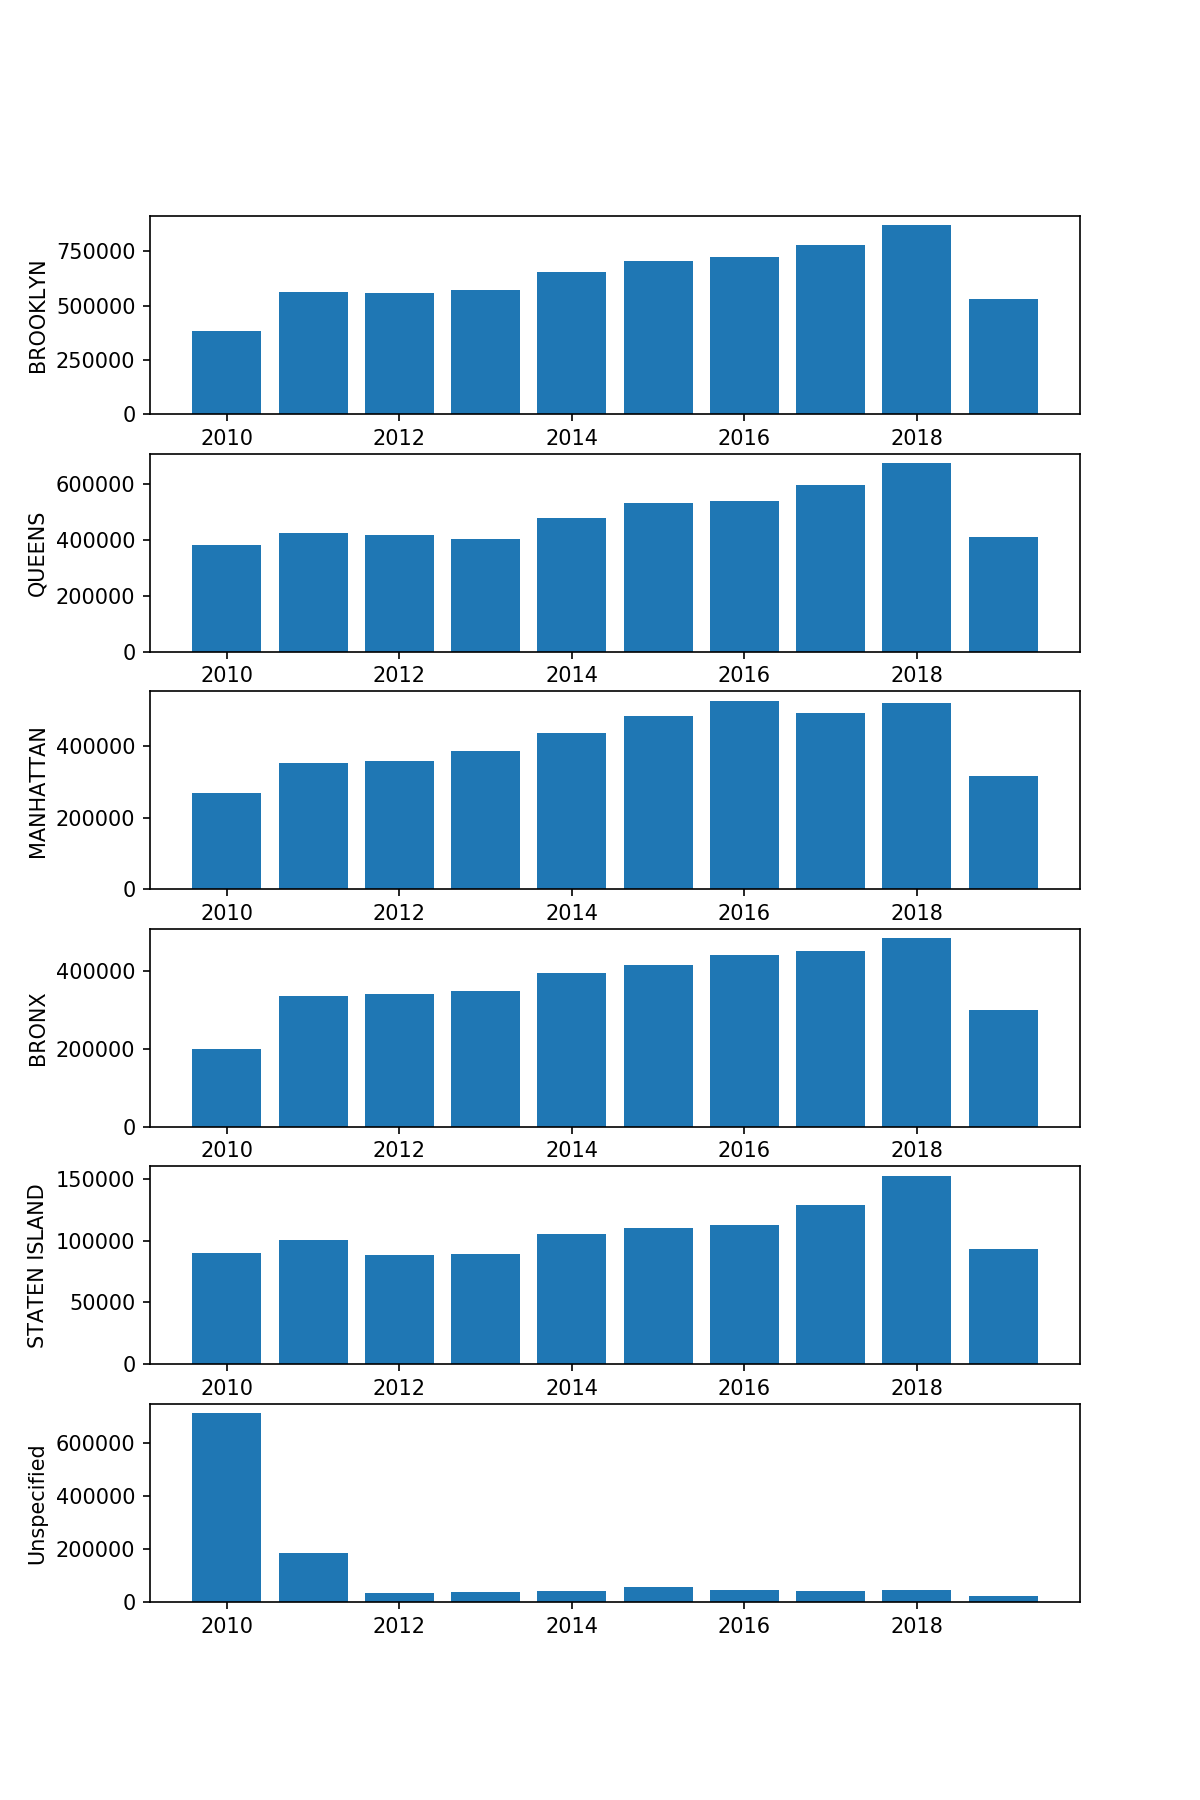

In [16]:
figure(figsize=[8, 12])
for i in range(len(borough)):
    subplot(len(borough), 1, i + 1)
    bar(b_yr_results[i][0].values, b_yr_results[i][1].values)
    # title(f'Incidents by Year; {borough[i]}')
    # xlabel('Year')
    ylabel(f'{borough[i]}')

# Lat Lng

In [17]:
q = f''' 
SELECT
  MAX(Latitude) as max_lat,
  MAX(Longitude) as max_lng,
  MIN(Latitude) as min_lat,
  MIN(Longitude) as min_lng
FROM
  public.three_one_one;'''

bounding_df = query_db(q)

In [18]:
bounding_df

,0,1,2,3
0,40.912940566995660,-73.70029199533596,39.552555178881700,-78.18450807772693


In [42]:
BBox = (-78.18450807772693, -73.70029199533596, 39.552555178881700, 40.912940566995660)

In [21]:
map_img = imread('../Images/map.png')

<IPython.core.display.Javascript object>


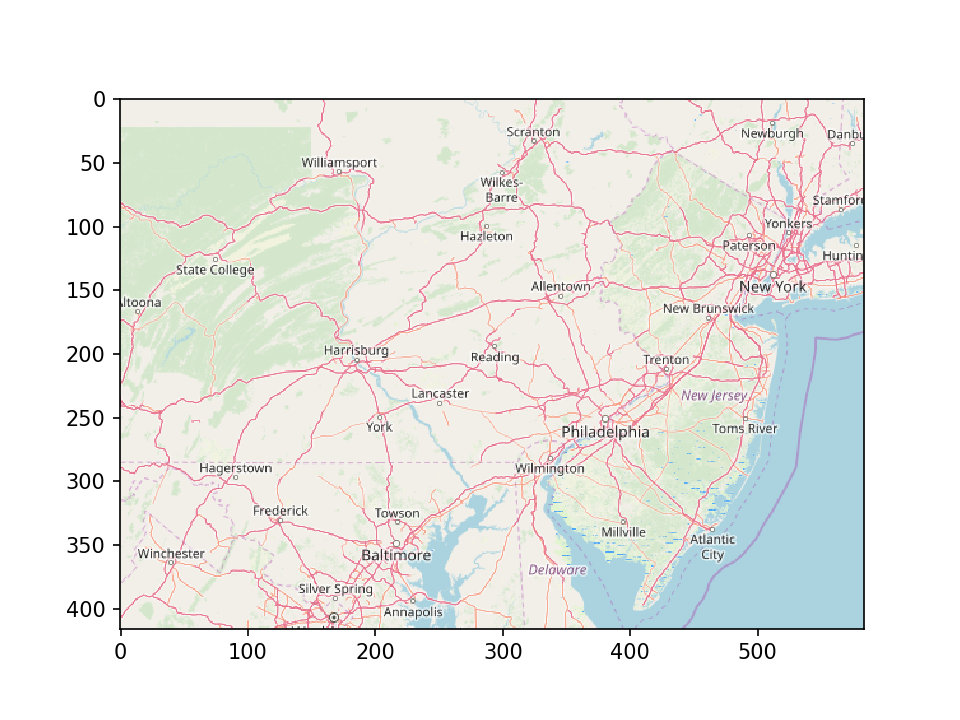

In [22]:
figure()
imshow(map_img)

In [90]:
top_complaints = [
    'Noise - Residential',
    'HEAT/HOT WATER',
    'Street Condition',
    'Street Light Condition',
    'HEATING',
    'Blocked Driveway',
    'Illegal Parking',
    'PLUMBING',
    'Water System',
    'GENERAL CONSTRUCTION',
    'General Construction/Plumbing'
]

q = f''' 
SELECT
  Latitude,
  Longitude,
  created_date,
  borough,
  complaint_type
FROM
  public.three_one_one
WHERE complaint_Type in ({", ".join("'" + str(x) + "'" for x in top_complaints)})
ORDER BY created_date;'''

df = query_db(q)
df[2] = pd.to_datetime(df[2])
df = df.rename(columns={0: "Lat", 1: "Lng", 2: "Date", 3: "Borough", 4: "Complaint"})
df.head()

,Lat,Lng,Date,Borough,Complaint
0,40.638696019448100,-73.94696900027189,2010-01-01 00:00:00,Unspecified,HEATING
1,40.859443761094740,-73.89351726080064,2010-01-01 00:00:00,Unspecified,PLUMBING
2,40.657227870301040,-73.91744716788068,2010-01-01 00:00:00,Unspecified,HEATING
3,40.843592585789970,-73.93790379522149,2010-01-01 00:00:00,Unspecified,PLUMBING
4,40.605911495950230,-73.96701865818098,2010-01-01 00:00:00,Unspecified,PLUMBING
5,40.858891581738210,-73.89907450833981,2010-01-01 00:00:00,Unspecified,HEATING
6,40.764519566787530,-73.98944090893806,2010-01-01 00:00:00,Unspecified,GENERAL CONSTRUCTION
7,40.666609998542185,-73.94042239547076,2010-01-01 00:00:00,Unspecified,HEATING
8,40.747195015391580,-73.90566775977622,2010-01-01 00:00:00,Unspecified,PLUMBING
9,40.835443865320330,-73.92895280296595,2010-01-01 00:00:00,Unspecified,HEATING


In [92]:
# df = df.rename(columns={0: "Lat", 1: "Lng", 2: "Date", 3: "Borough", 4: "Complaint"})
# df.head()

,Lat,Lng,Date,Borough,Complaint
0,40.638696019448100,-73.94696900027189,2010-01-01,Unspecified,HEATING
1,40.859443761094740,-73.89351726080064,2010-01-01,Unspecified,PLUMBING
2,40.657227870301040,-73.91744716788068,2010-01-01,Unspecified,HEATING
3,40.843592585789970,-73.93790379522149,2010-01-01,Unspecified,PLUMBING
4,40.605911495950230,-73.96701865818098,2010-01-01,Unspecified,PLUMBING


<IPython.core.display.Javascript object>


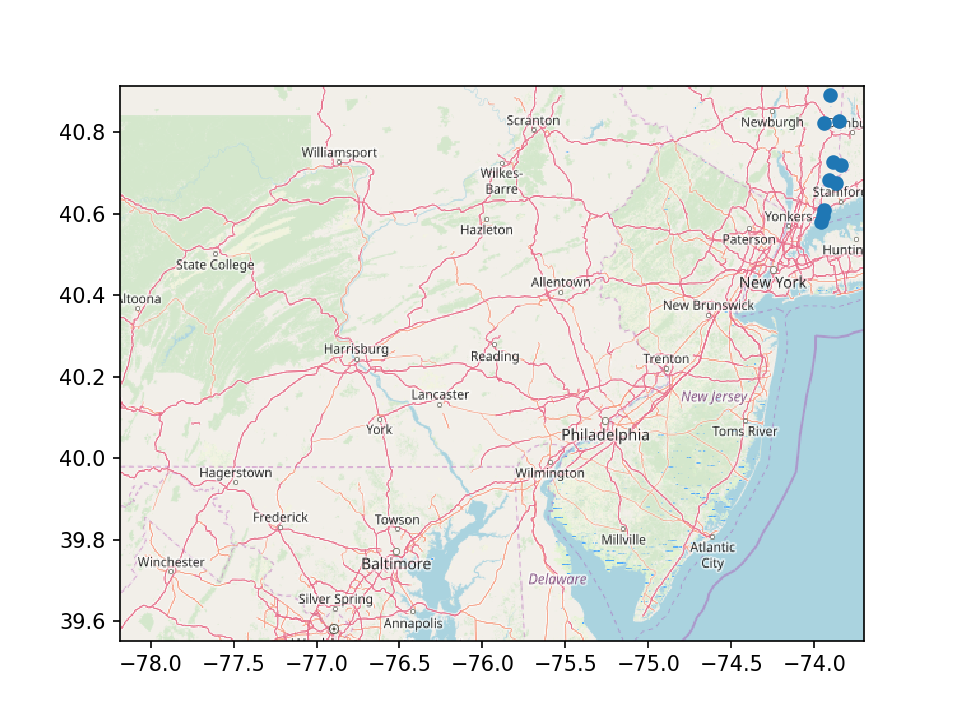

In [68]:
fig, ax = subplots()
x, y = [],[]
sc = ax.scatter(x,y)
num_iter = 10
counter = 0
window = 10


def animate(i):
#     x.append(np.random.rand(1)*10)
#     y.append(np.random.rand(1)*10)
#     map_df = dfs[0]
    c = 'b'
    x = map_df[1].values[i:i + window]
    y = map_df[0].values[i:i + window]
    sc.set_offsets(c_[x,y])
    
#     map_df = dfs[1]
#     c = 'r'
#     x = map_df[1].values[i:i + window]
#     y = map_df[0].values[i:i + window]
#     sc.set_offsets(c_[x,y], color=c)
    
#     map_df = dfs[2]
#     c = 'g'
#     x = map_df[1].values[i:i + window]
#     y = map_df[0].values[i:i + window]
#     sc.set_offsets(c_[x,y], color=c)

#     map_df = dfs[3]
#     c = 'k'
#     x = map_df[1].values[i:i + window]
#     y = map_df[0].values[i:i + window]
#     sc.set_offsets(c_[x,y], color=c)
    
ani = animation.FuncAnimation(fig, animate, 
                frames=10, interval=500, repeat=False) 
imshow(map_img, zorder=0, extent = BBox, aspect= 'auto')
show()

In [96]:
colors = {'Noise - Residential': '#1f77b4',
          'HEAT/HOT WATER': '#ff7f0e' ,
          'Street Condition': '#2ca02c',
          'HEATING': '#d62728',
          'Blocked Driveway': '#9467bd',
          'Illegal Parking': '#8c564b',
          'PLUMBING': '#e377c2',
          'Water System': '#7f7f7f',
          'GENERAL CONSTRUCTION': '#bcbd22',
          'General Construction/Plumbing': '#17becf'
}

# TODO round off lat and lng to get groups or cluster them

In [98]:
counts = df.groupby(['Lng', 'Lat']).count()
index = list(counts.index)
longs = [each[0] for each in index]
lats = [each[1] for each in index]
sizes = counts['School']*10
figure()
ax.scatter(longs, lats, s=sizes,
               color=colors[school_name], alpha=0.8,
               transform=ccrs.PlateCarree())

In [99]:
len(grad_counts)


907670

In [60]:
dfs[0].head()

,0,1,2,3
0,40.612154586937580,-73.95503629769145,2010-01-01 00:03:46,BROOKLYN
1,40.635707991592696,-74.00685286309795,2010-01-01 00:08:02,BROOKLYN
2,40.759485679831120,-73.98913488475046,2010-01-01 00:08:29,MANHATTAN
3,40.634762238296810,-74.16972676202693,2010-01-01 00:08:30,STATEN ISLAND
4,40.755060291839530,-73.83225149777755,2010-01-01 00:15:08,QUEENS


<IPython.core.display.Javascript object>


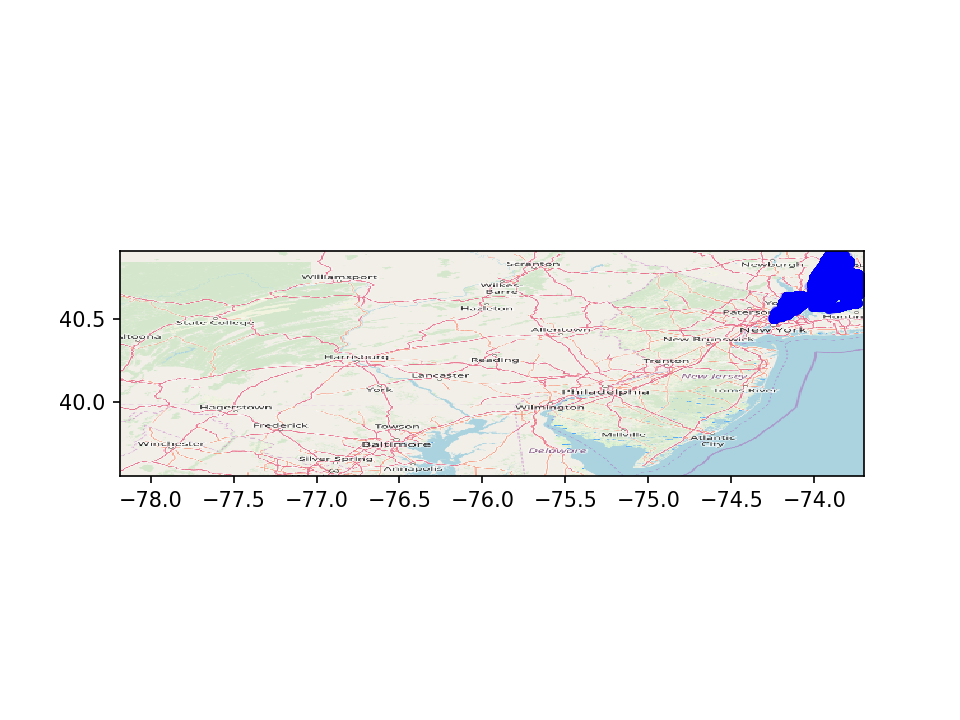

In [46]:
figure()
scatter(map_df[1], map_df[0], zorder=1, alpha=0.2, c='b', s=10)
imshow(map_img, zorder=0, extent = BBox, aspect= 'equal')

<IPython.core.display.Javascript object>


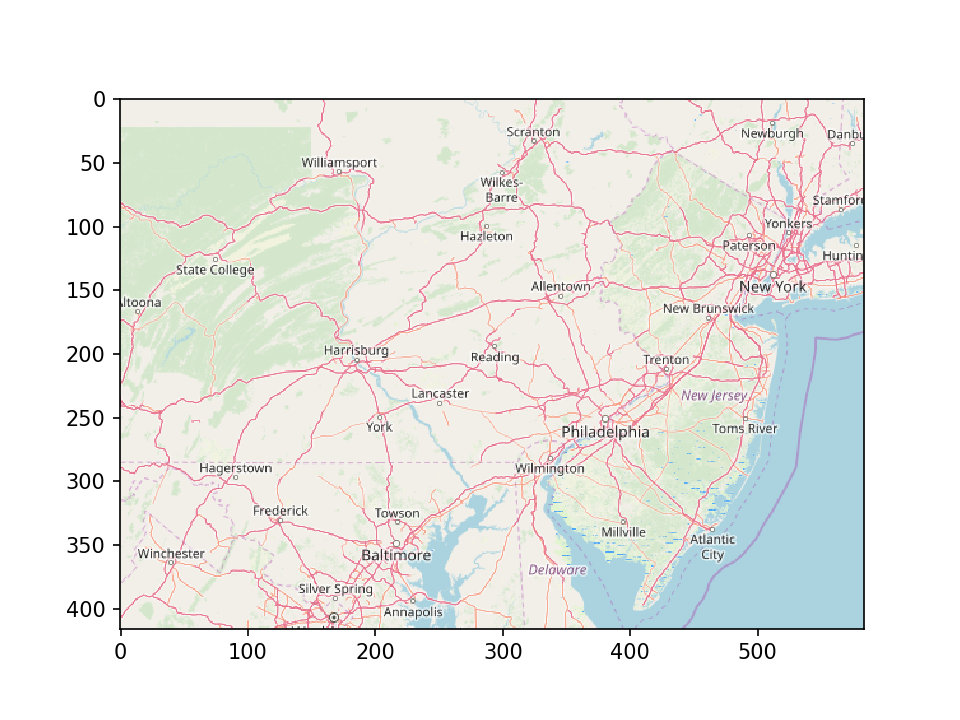

In [48]:
figure()
imshow(map_img, zorder=0)

In [57]:
map_df.head()

,0,1,2,3
0,40.762333563356236,-73.98036975966778,2010-06-03 15:41:11,MANHATTAN
1,40.747629283687225,-73.97673618969121,2010-06-03 16:09:26,MANHATTAN
2,40.756219492853600,-73.85961581838639,2010-06-03 16:14:44,QUEENS
3,40.638716017681220,-73.96299575259150,2010-06-03 16:46:13,BROOKLYN
4,40.618095492559114,-74.08620732059231,2010-06-03 17:41:12,STATEN ISLAND


<IPython.core.display.Javascript object>


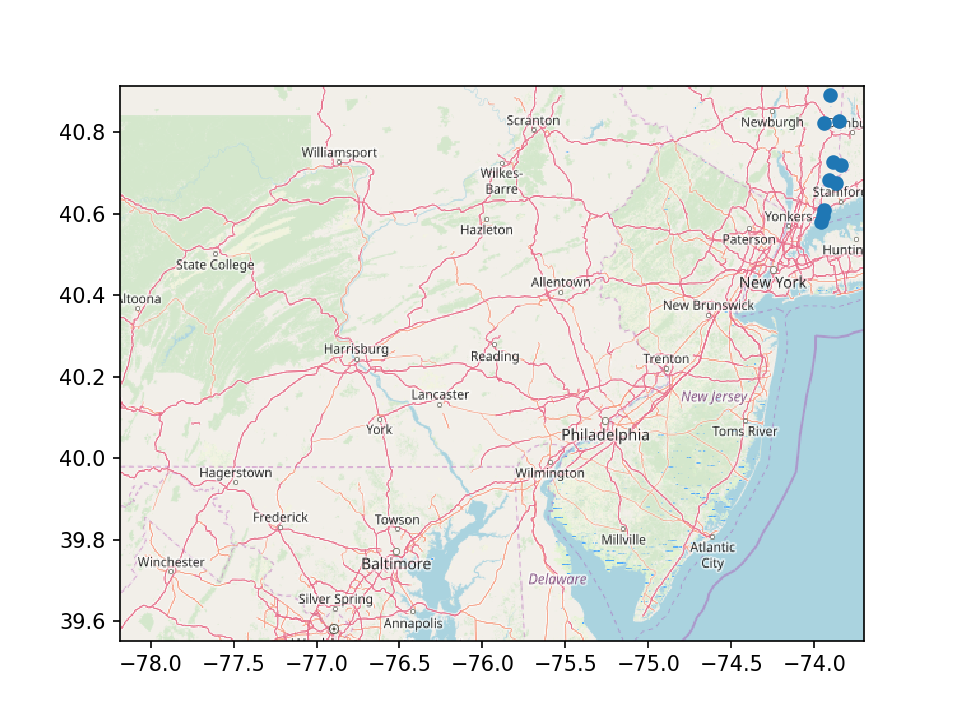

In [54]:
fig, ax = subplots()
x, y = [],[]
sc = ax.scatter(x,y)
num_iter = 10
counter = 0
window = 10


def animate(i):
#     x.append(np.random.rand(1)*10)
#     y.append(np.random.rand(1)*10)
    x = map_df[1].values[i:i + window]
    y = map_df[0].values[i:i + window]
    sc.set_offsets(c_[x,y])

ani = animation.FuncAnimation(fig, animate, 
                frames=10, interval=500, repeat=False) 
imshow(map_img, zorder=0, extent = BBox, aspect= 'auto')
show()

<IPython.core.display.Javascript object>


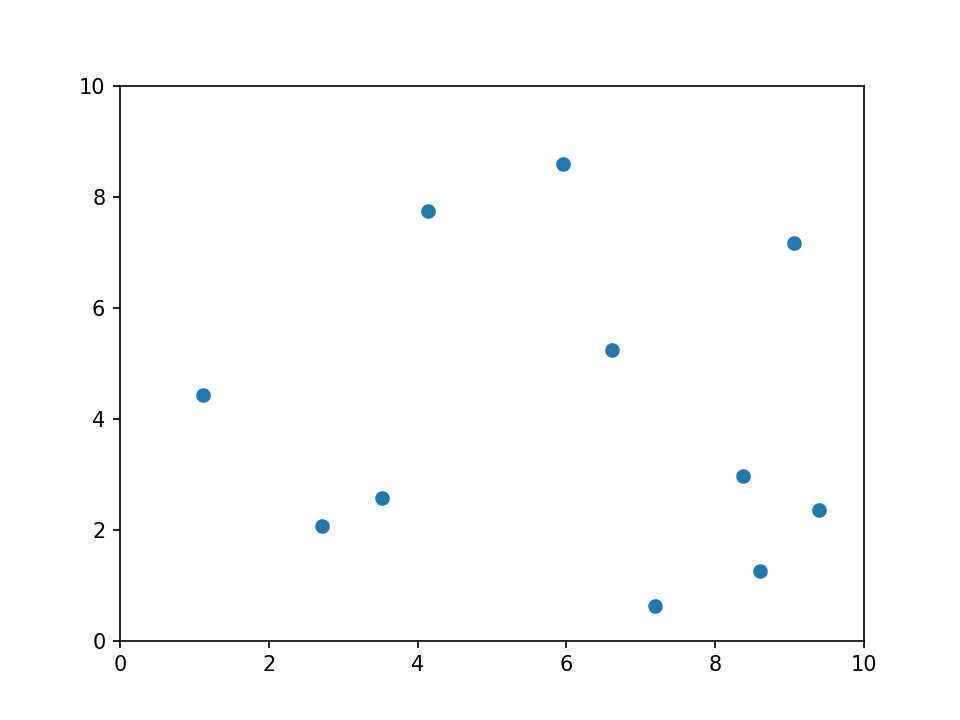

In [35]:
fig, ax = subplots()
x, y = [],[]
sc = ax.scatter(x,y)
xlim(0,10)
ylim(0,10)

def animate(i):
    x.append(np.random.rand(1)*10)
    y.append(np.random.rand(1)*10)
    sc.set_offsets(c_[x,y])

ani = animation.FuncAnimation(fig, animate, 
                frames=10, interval=200, repeat=False) 
show()

In [ ]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

<IPython.core.display.Javascript object>


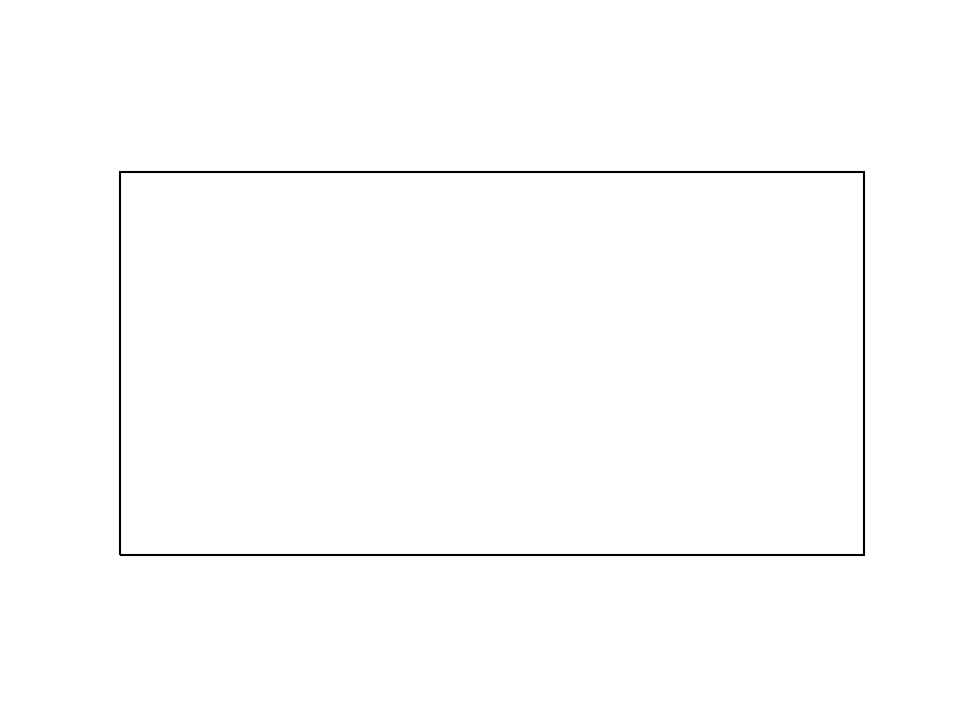

ValueError: Image "BM" and resolution "low" are not present in the user background image metadata in directory "/home/ubuntu/anaconda3/lib/python3.7/site-packages/cartopy/data/raster/natural_earth"

In [85]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.Mercator(central_longitude=0,  
                                       min_latitude=-65,
                                       max_latitude=70))
ax.background_img(name='BM', resolution='low')
ax.set_extent([-170, 179, -65, 70], crs=ccrs.PlateCarree())

<IPython.core.display.Javascript object>


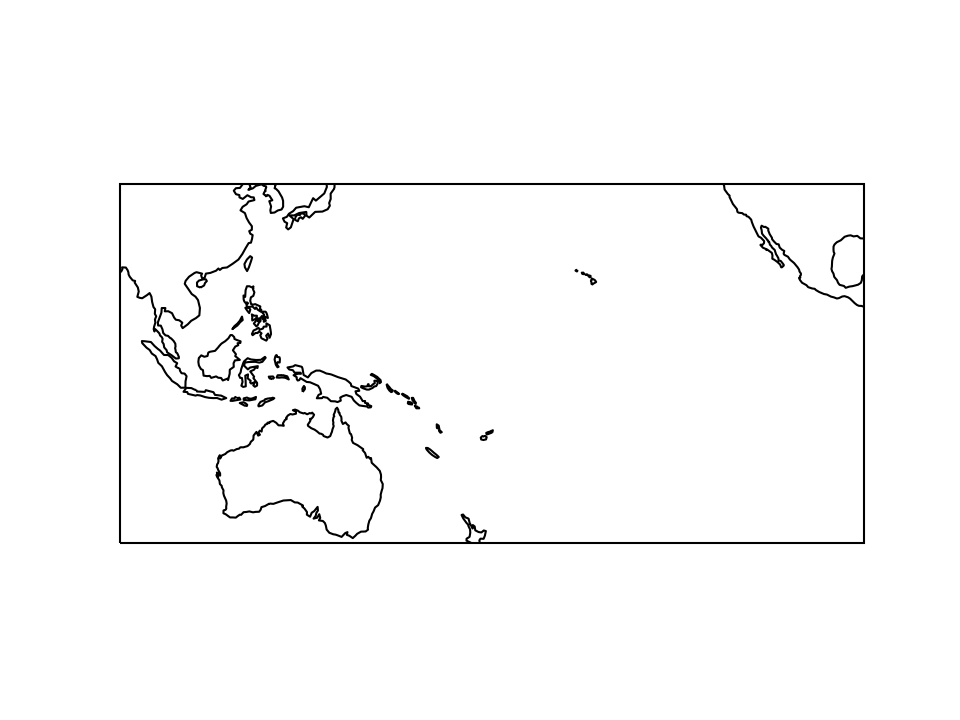

In [84]:
figure()
# Create Mercator projection with dateline in the middle:
ax = plt.axes(projection=ccrs.Mercator(central_longitude=180))
# Draw coastlines so we know where we are:
ax.coastlines()
# Set the map extent, making sure to specify the correct coordinate system
# for geographical coordinates:
ax.set_extent([90, 270, -40, 40], crs=ccrs.PlateCarree())
plt.show()

In [ ]:
fig, ax = subplots()
imshow(map_img, zorder=0, extent = BBox, aspect= 'auto')
colors = {'AI': '#02b3e4',
          'Aut Sys': '#f95c3c' ,
          'Business': '#ff5483',
          'Developers': '#ecc81a'}
for school, school_data in grads.groupby('School'):
    
    grad_counts = school_data.groupby(['Long', 'Lat']).count()
    
    # Get lists for longitudes and latitudes of graduates
    index = list(grad_counts.index)
    longs = [each[0] for each in index]
    lats = [each[1] for each in index]
    sizes = grad_counts['School']*10
    # The school names are like 'School of AI', remove 'School of '
    school_name = ' '.join(school.split()[2:])
    
    ax.scatter(longs, lats, s=sizes,
               color=colors[school_name], alpha=0.8,
               transform=ccrs.PlateCarree())